<a href="https://www.kaggle.com/souravbhandari/eda-classification?scriptVersionId=89718963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Table of Contents

* imported libraries 
* EDA :
  (1) lets check classes and encode them 
  (2) Heatmap
  (3) lets check Distribution of dataset
  (4) Outliers and removing outliers
* Modeling
   (1) logestic regression (1 vs rest)
   (2) Random Forest 
* Metrics 
  *Accuracy 
  *confusion metrics

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif


**Load libs..**

In [4]:
from scipy.io import arff
data = arff.loadarff(r"../input/dry-bean-dataset/Dry_Bean_Dataset.arff")
df=pd.DataFrame(data[0])
print(df.head(5))

      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.00

if you dont know how to load arff dataset see :
https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

In [5]:
#check null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [7]:
#lets check the classe
df["Class"].unique()

array([b'SEKER', b'BARBUNYA', b'BOMBAY', b'CALI', b'HOROZ', b'SIRA',
       b'DERMASON'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

In [9]:
for col in df.columns:
  df['Class'] = lb_encoder.fit_transform(df['Class'])

In [10]:
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Variable')

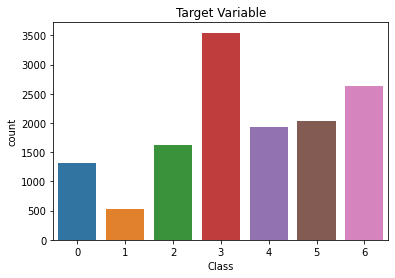

In [11]:
sns.countplot(df['Class'])
plt.title('Target Variable')
#little imbalance

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

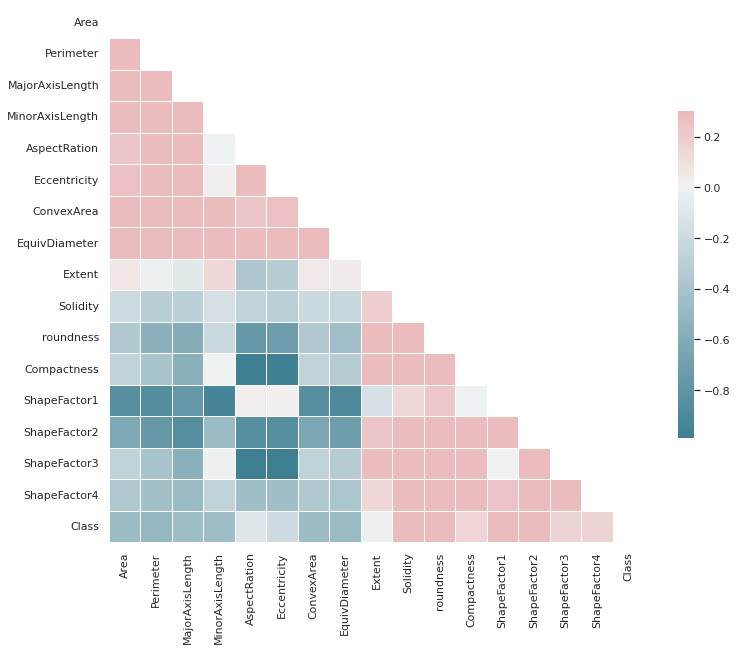

In [12]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribution')

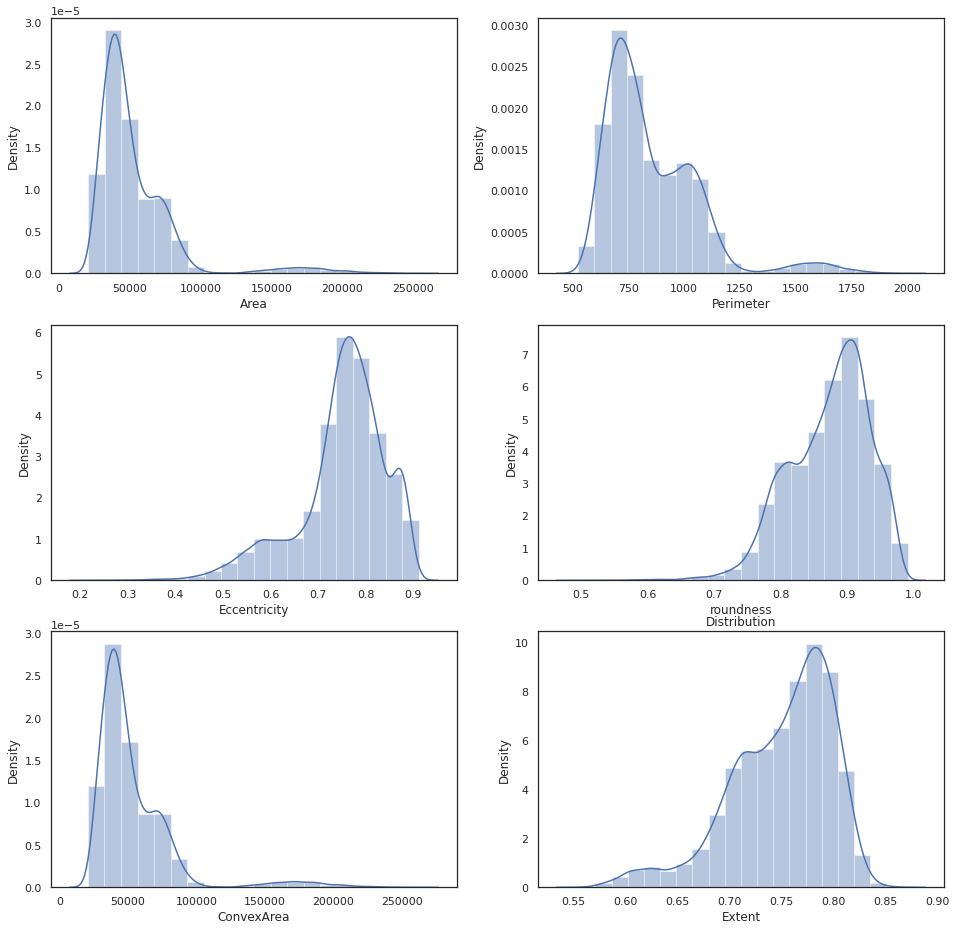

In [20]:
fig, ax = plt.subplots(3,2, figsize=(16,16))
sns.distplot(df.Area, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Perimeter, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Eccentricity, bins = 20, ax=ax[1,0]) 
sns.distplot(df.roundness, bins = 20, ax=ax[1,1]) 
sns.distplot(df.ConvexArea, bins = 20, ax=ax[2,0])
sns.distplot(df.Extent, bins = 20, ax=ax[2,1])
#sns.distplot(df.Extent, bins = 20, ax=ax[3,0]) 
#sns.distplot(df.Roundness, bins = 20, ax=ax[3,1]) 
plt.title('Distribution')

**There is some Skewed data ..**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


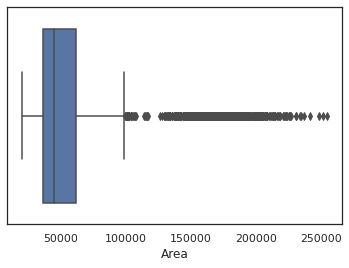

In [24]:
def boxp(col):
    sns.boxplot(col)
boxp(df['Area']) 


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


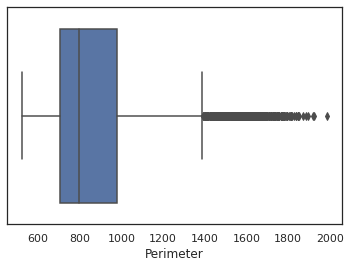

In [23]:
boxp(df['Perimeter'])

In [25]:
#lets do one thing remove outlier from whole dataset:
import scipy.stats as stats
df1=df.copy()
Q1 = df1.quantile(q=.25)
Q3 = df1.quantile(q=.75)
IQR = df1.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df1 = df1[~((df1 < (Q1-1.5*IQR)) | (df1 > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df1.shape
p

(10594, 17)

**outliers removed**

In [26]:
df.shape#initial dataset shape 

(13611, 17)

In [27]:
x = df1.drop(['Class'], axis=1)
y = df1['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

In [28]:
#scale dataset
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [30]:
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test,pred))

[[195  15   0   0   1   3]
 [ 15 221   0   8   0   1]
 [  0   0 635   1   6  51]
 [  0   5   5 194   0   9]
 [  2   2   9   0 217   7]
 [  1   0  39  10   3 464]]
0.9089193015573384


**90Percent Accuracy**

In [34]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(n_estimators=100)
m2.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
pred_rf = m2.predict(x_test)
cm = confusion_matrix(y_test, pred_rf)
print(cm)
print(accuracy_score(y_test,pred_rf))

[[195  13   0   0   1   5]
 [ 12 225   0   8   0   0]
 [  0   0 643   0   7  43]
 [  0   7   4 191   0  11]
 [  2   0  10   0 220   5]
 [  2   1  49   6   4 455]]
0.9103350637092968
